# ASSEMBLY LINE ANALYSIS 
#### (Using Bosch Dataset) - Work in progress
### Given Information:
Data represents measurements given in 3 different types of data- numeric, categorical and date and their timestamps on products as they move through production. 

At the end quality coontrol accepts or rejects them. The data is anonymized, has many features, is sparse (many many missing values) and is approximately 8gb.

### Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ls

Assembly Line Analysis.ipynb*  softmax.py*
bosch.py                       test_categorical.csv*
code.py                        test_categorical.csv.zip*
correlation plot2.png*         test_date.csv.zip*
correlation plot.png*          test_numeric.csv*
Deep Learning.ipynb*           test_numeric.csv.zip*
feature correlation.py*        train_categorical.csv*
figure_1-1.png                 train_categorical.csv.zip*
figure_1.png                   train_date.csv*
flowpaths.png*                 train_date.csv.zip*
group_aggregate_numeric.csv*   train_numeric.csv*
preliminary analysis1.png*     train_numeric.csv.zip*
preliminary analysis2.png*     try.py*
prodfams1 - Copy.csv*          Untitled1.ipynb*
prodfams1.csv*                 Untitled.ipynb*
sample_submission.csv*         visual1.R*
sample_submission.csv.zip*     visual.R*
softmax*                       xgboost/


In [3]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission 

,Id,Response
0,1,0
1,2,0
2,3,0
3,5,0
4,8,0
5,10,0
6,12,0
7,15,0
8,17,0
9,19,0


Approxmately 1.2 million rows (ids of individual products)

In [4]:
td = pd.read_csv("train_date.csv", nrows=0)
td

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263


In [5]:
tn = pd.read_csv("train_numeric.csv", nrows=0)
tn

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response


In [6]:
tc = pd.read_csv("train_categorical.csv", nrows=0)
tc

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240


We can infer from this data that the data collected if we ignore the type of the data ie.(F/D) and consider the data to be in the format Lx_Sy_number (where x represents the line number, y represents the station number and number represents the feature number. here we have omitted the D or F respectively eg. L0_S0_F0 is written in the format L0_S0_0) we can infer that all the 4263 features that are measured are distributed across the three different csv file that are partitioned based on the data type and the response whether it passes or fails the test is given 

Another question that we have to ask is whether all features are measured for all parts or not
In other words we hav to check how imbalanced the classes are or how much of data is missing

In [7]:
train_response = pd.read_csv("train_numeric.csv", usecols=['Response'])

We are going to work only on the respomse column to calculate the failure rate

In [8]:
train_response.sum()

Response    6879
dtype: int64

The sum will give us the number of parts that have failed the testing process because the response for the parts that have failed the testing process is 1 and the response for the parts that have passed the quality control is 0

In [9]:
train_response.count()

Response    1183747
dtype: int64

The count value will give us the total number of parts checked

In [10]:
train_response.sum()/train_response.count()

Response    0.005811
dtype: float64

#### Hence the failure rate is less than 0.06%

Another possibility that we should consider is that the lines L0, L1 etc might represent different products. The stations are  but it is not clear whether it represents the product moving across the line.

In [11]:
train_numeric = pd.read_csv("train_numeric.csv", nrows=1000)

The full data is huge and will take an enormous amount of RAM so we are first testing for a smaller chunk of data

Let us first look at the data that failed the quality test

In [12]:
train_numeric[train_numeric['Response'] == 1]

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
539,1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
633,1250,0.075,0.101,-0.179,-0.216,-0.013,0.070,-0.022,-0.152,0.087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
681,1350,0.069,0.041,0.330,0.330,-0.100,-0.294,0.008,0.088,-0.092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
887,1793,0.003,-0.026,0.330,0.294,0.074,0.161,0.022,0.128,-0.199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


We can see there there is no specific pattern that can be realised with preliminary analysis. However the number of failed products is very low

In [13]:
train_numeric[train_numeric['L0_S0_F0'].isnull()].filter(regex=("L0_S0_.*"))

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lots of missing data. Let's check that if the first feature in the station is missing will all the features be missing

In [14]:
train_numeric[train_numeric['L0_S0_F0'].isnull()].filter(regex=("L0_S0.*")).sum()

L0_S0_F0    NaN
L0_S0_F2    NaN
L0_S0_F4    NaN
L0_S0_F6    NaN
L0_S0_F8    NaN
L0_S0_F10   NaN
L0_S0_F12   NaN
L0_S0_F14   NaN
L0_S0_F16   NaN
L0_S0_F18   NaN
L0_S0_F20   NaN
L0_S0_F22   NaN
dtype: float64

Looks like it satisfies the condition. Taking more data to be analysed

In [15]:
train_numeric[train_numeric['L0_S0_F0'].isnull()].filter(regex=("L0_.*")).sum()

L0_S0_F0         NaN
L0_S0_F2         NaN
L0_S0_F4         NaN
L0_S0_F6         NaN
L0_S0_F8         NaN
L0_S0_F10        NaN
L0_S0_F12        NaN
L0_S0_F14        NaN
L0_S0_F16        NaN
L0_S0_F18        NaN
L0_S0_F20        NaN
L0_S0_F22        NaN
L0_S1_F24     -0.225
L0_S1_F28     -0.025
L0_S2_F32        NaN
L0_S2_F36        NaN
L0_S2_F40        NaN
L0_S2_F44        NaN
L0_S2_F48        NaN
L0_S2_F52        NaN
L0_S2_F56        NaN
L0_S2_F60        NaN
L0_S2_F64        NaN
L0_S3_F68      0.009
L0_S3_F72     -0.066
L0_S3_F76     -0.051
L0_S3_F80      0.373
L0_S3_F84     -0.002
L0_S3_F88      0.000
L0_S3_F92      0.019
               ...  
L0_S21_F532    0.099
L0_S21_F537   -0.003
L0_S22_F546   -0.513
L0_S22_F551   -0.063
L0_S22_F556   -0.592
L0_S22_F561   -0.451
L0_S22_F566   -1.251
L0_S22_F571   -1.222
L0_S22_F576   -1.062
L0_S22_F581   -0.463
L0_S22_F586   -0.724
L0_S22_F591   -0.862
L0_S22_F596   -0.035
L0_S22_F601   -0.919
L0_S22_F606   -0.477
L0_S22_F611   -0.942
L0_S23_F619  

#### Not all are NaN if the first feature is NaN

that means a product can be measured somewhere else on the line even if it is not measured on the first station

In [16]:
with pd.option_context('display.max_rows', 9999, 'display.max_columns', 3):
    print(train_numeric.count())

Id              1000
L0_S0_F0         600
L0_S0_F2         600
L0_S0_F4         600
L0_S0_F6         600
L0_S0_F8         600
L0_S0_F10        600
L0_S0_F12        600
L0_S0_F14        600
L0_S0_F16        600
L0_S0_F18        600
L0_S0_F20        600
L0_S0_F22        600
L0_S1_F24        601
L0_S1_F28        601
L0_S2_F32        311
L0_S2_F36        311
L0_S2_F40        311
L0_S2_F44        311
L0_S2_F48        311
L0_S2_F52        311
L0_S2_F56        311
L0_S2_F60        311
L0_S2_F64        311
L0_S3_F68        290
L0_S3_F72        290
L0_S3_F76        290
L0_S3_F80        290
L0_S3_F84        290
L0_S3_F88        290
L0_S3_F92        290
L0_S3_F96        290
L0_S3_F100       290
L0_S4_F104       303
L0_S4_F109       303
L0_S5_F114       298
L0_S5_F116       298
L0_S6_F118       280
L0_S6_F122       280
L0_S6_F132       280
L0_S7_F136       321
L0_S7_F138       321
L0_S7_F142       321
L0_S8_F144       599
L0_S8_F146       599
L0_S8_F149       599
L0_S9_F155       196
L0_S9_F160   

For the most part, if a station has any measurements, all measurements are performed.
- Under this regime, there appears to be some missing data. 
- Also, for a few stations, in particular L1_S25, there are irregular numbers of measurements. 
The values across lines also show that a product can be measured at stations on multiple lines.


Let's examine a few example rows to look for patterns in the stations for which there are measurements.

In [17]:
train_numeric_2 = train_numeric.copy()
train_numeric_2[train_numeric_2['L0_S0_F0'].isnull() == False]

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,13,0.003,0.019,0.294,0.312,0.031,0.161,0.022,0.088,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,18,-0.016,-0.041,-0.179,-0.179,-0.056,0.161,-0.007,-0.032,-0.082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,26,0.016,0.093,-0.015,-0.016,0.031,0.116,-0.007,-0.072,0.209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11,27,-0.062,-0.153,-0.197,-0.179,-0.187,-0.384,0.000,0.088,-0.199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12,28,-0.075,-0.093,0.367,0.348,-0.056,0.025,0.008,0.048,-0.031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13,31,-0.003,-0.093,-0.161,-0.216,0.118,-0.021,-0.015,0.048,-0.031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [18]:
train_numeric_2[:5]

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


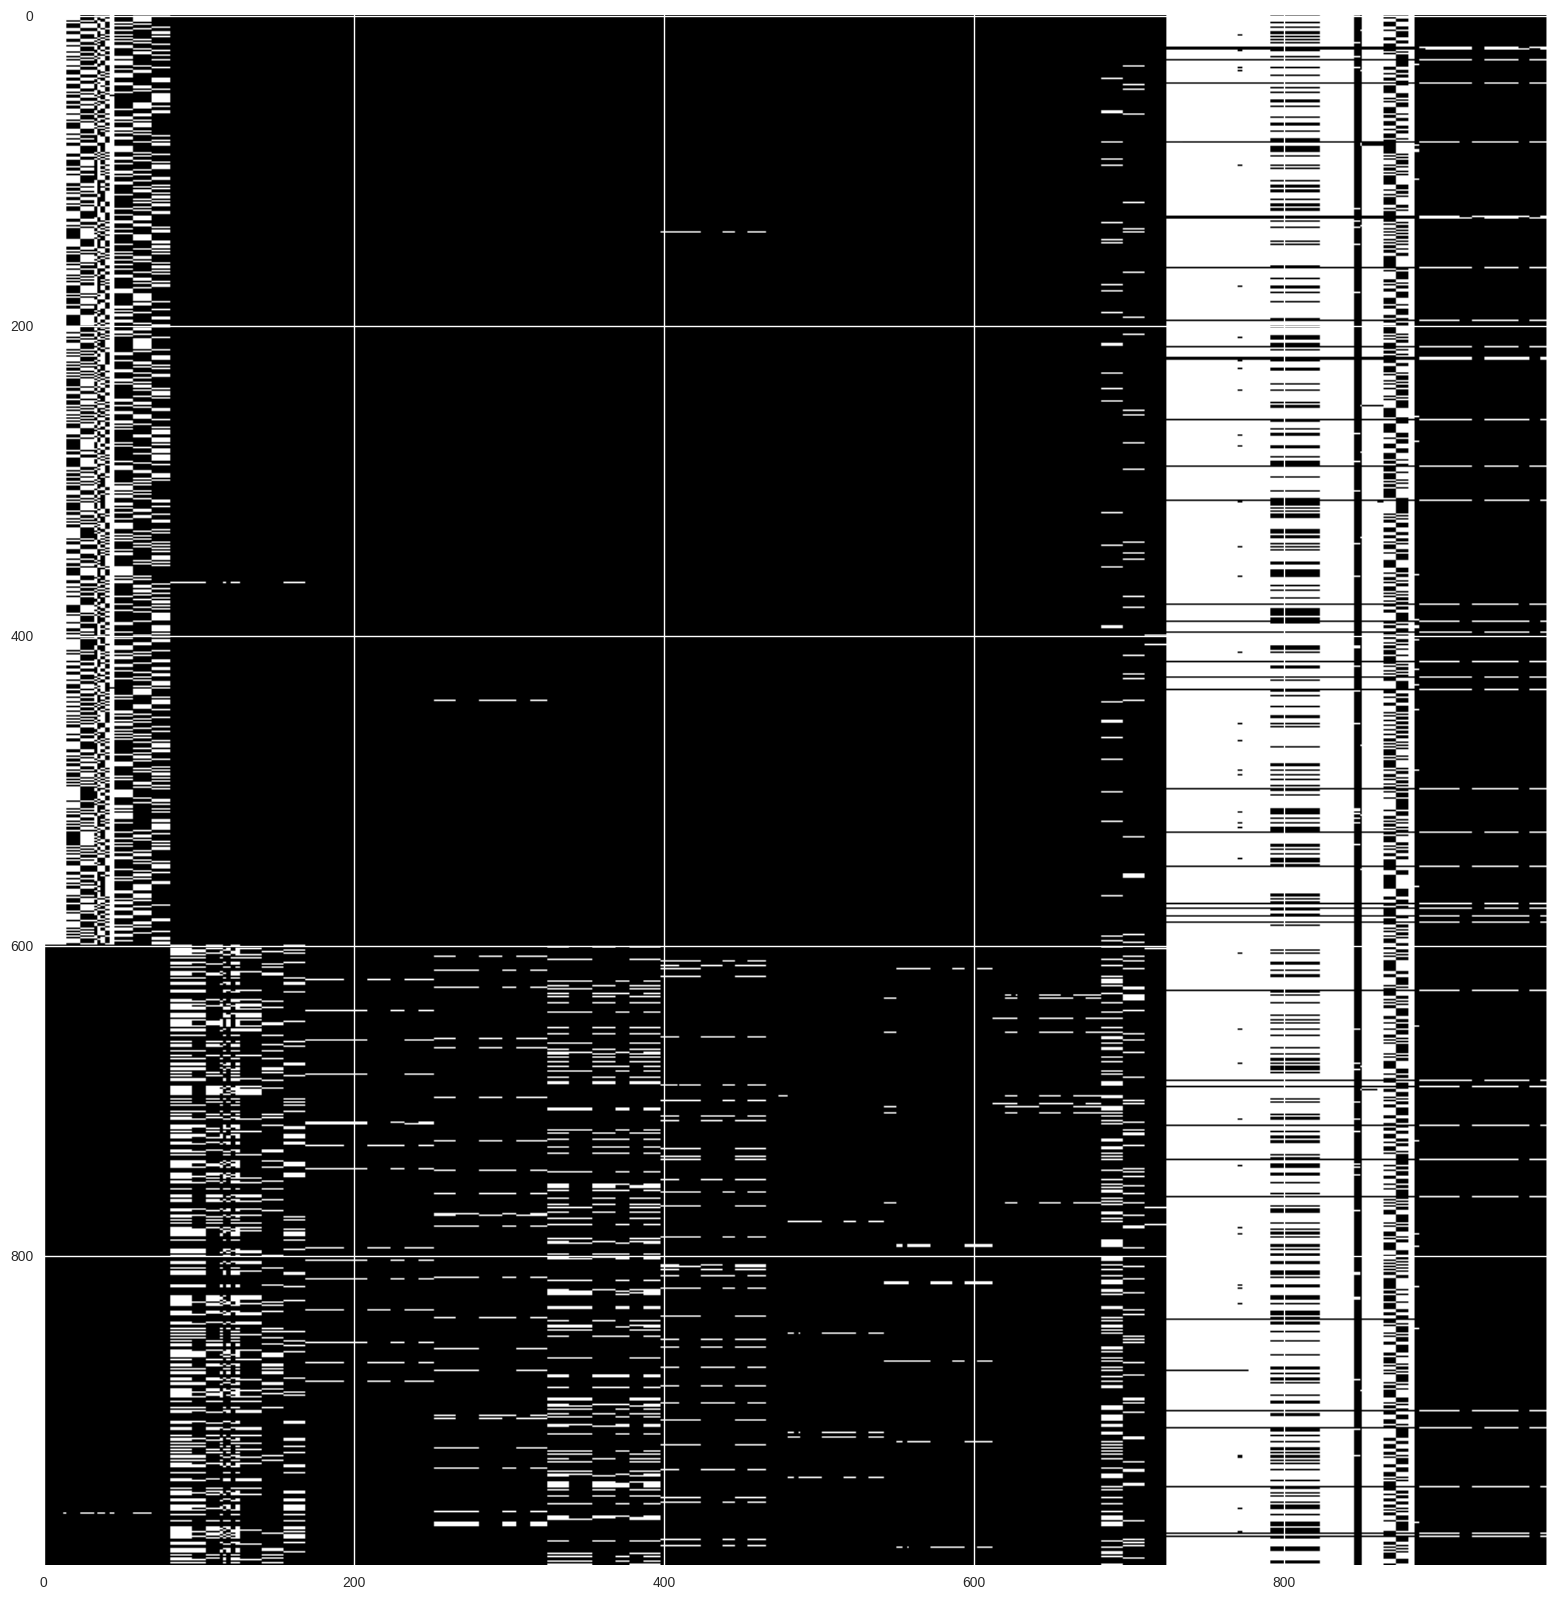

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(train_numeric_2.isnull().sort_values(by=['L0_S0_F0'] ) )

There are clearly patterns in the NaN values, but it appears there may be alot of either trully missing values, or a large number of groupings

In [20]:
train_numeric.transpose().count().sort_values().value_counts()

192    332
160    109
212     93
194     90
162     61
206     54
112     26
209     25
164     21
166     20
208     16
222     15
157     14
163     11
195     11
211     10
180     10
114      9
159      8
193      6
161      5
189      4
177      4
168      4
198      3
200      3
174      3
117      3
197      2
183      2
203      2
176      2
171      2
257      1
153      1
147      1
137      1
132      1
108      1
126      1
179      1
165      1
167      1
172      1
255      1
182      1
185      1
190      1
205      1
229      1
237      1
252      1
2        1
dtype: int64

Number of measurements, number of products measured that many times (Of the first 1000 rows).

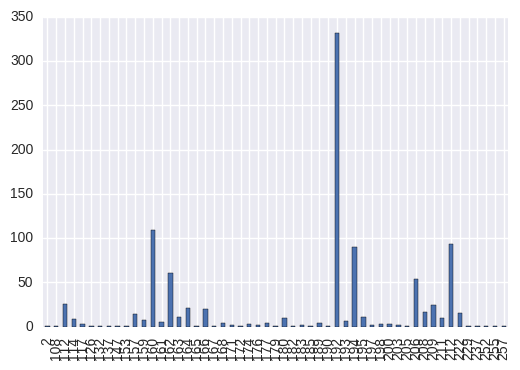

In [21]:
train_numeric.transpose().count().value_counts().sort_index().plot(kind='bar')

~80% products in the top 10 # of measurements. Some products are measured a unique number of times.
While many products may fit patterns with standard numbers of measurements, it does NOT appear we will quickly and clearly group products by which measurements they are subject to. With this spread, there will be some uncertainty about whether the data is missing or actually represents a different item.
It is also possible that instead of missing values, some of the unique entries may represent additional testing performed. This would explain the counts for L1_S25. Whether this is true, or there is missing data, there may be significant differences between the failure rates based upon this value as it would represent some kind of anomoly during production or testing.

We can explore whether or not this is true/useful by comparing failure rates based upon the number of measurements, and how many products had the same number of measurements.
To do this, we need to perform an aggregation without reading the whole dataset into memory through pandas, so we should process the csv line by line.
We also would like to use the categorical and timestamp data if possible.
It would be good to aggregate the number of non-NaN, a breakdown by line, and possibly station. That would reduce the number of features from 4264 (across all files: numeric, categorical, timestamp) to at most 55 (51 stations, 3 line subtotals and 1 overall total). This assumes missing values for the numeric and categorical files match missing timestamps.


Check that the id column matches between all file

We need to determine which columns should be eliminated. We want to eliminate the columns that do not provide more information about the particulat product ie.There are two columns that are almost identical. The best method is feature correlation where we eliminate one of the columns that have a Pearson's correlation value greater than a certain threshold

   L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  L0_S0_F12  \
0     0.030    -0.034    -0.197    -0.179     0.118      0.116     -0.015   
1       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
2     0.088     0.086     0.003    -0.052     0.161      0.025     -0.015   
3    -0.036    -0.064     0.294     0.330     0.074      0.161      0.022   
4    -0.055    -0.086     0.294     0.330     0.118      0.025      0.030   
5     0.003     0.019     0.294     0.312     0.031      0.161      0.022   
6       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
7       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
8    -0.016    -0.041    -0.179    -0.179    -0.056      0.161     -0.007   
9       NaN       NaN       NaN       NaN       NaN        NaN        NaN   

   L0_S0_F14  L0_S0_F16  L0_S0_F18  
0     -0.032      0.020      0.083  
1        NaN        NaN        NaN  
2     -0.072     -0.225     -0.147  
3   

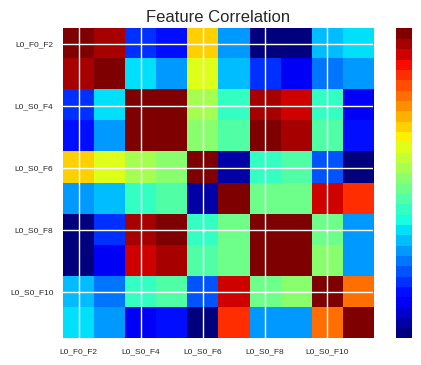

In [22]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Read file into a Pandas dataframe
from pandas import DataFrame, read_csv 
df = pandas.read_csv("train_numeric.csv",usecols=[1,2,3,4,5,6,7,8,9,10])
df=df[0:10]
print(df)

#corr = df.corr()
#print(corr)
#fig, ax = plt.subplots(figsize=(10, 10))
#ax.matshow(corr)
#plt.xticks(range(len(corr.columns)), corr.columns);
#plt.yticks(range(len(corr.columns)), corr.columns);
#cbar = fig.colorbar(corr, ticks=[0,.75,.8,.85,.90,.95,1])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

def correlation_matrix(df):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['L0_S0_F0','L0_F0_F2','L0_S0_F4','L0_S0_F6','L0_S0_F8','L0_S0_F10','L0_S0_F12','L0_S0_F14','L0_S0_F16','L0_S0_F18']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
   
    # Add colorbar, make sure to specify tick locations to6match desired ticklabels
    cbar = fig.colorbar(cax, ticks=[])
    cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
    plt.show()

correlation_matrix(df)

In [23]:
train_numeric_id = pd.read_csv("train_numeric.csv", usecols=['Id'])
train_categorical_id = pd.read_csv("train_categorical.csv", usecols=['Id'])
train__date_id = pd.read_csv("train_date.csv", usecols=['Id'])

In [24]:
train_numeric_id.equals(train__date_id)

True

In [25]:
train_numeric_id.equals(train_categorical_id)

True

Iterate through the lines of the date csv and produce a dataset with value counts:

First, let us examine the features across all files

Find indicies representing Line and Station for each file.

In [26]:
import pprint

def clean_featurename(feature):
    if '_' in feature:
        feature_tmp = feature.replace('F','')
        feature_tmp = feature_tmp.replace('D','')
        feature_num = feature_tmp.split('_')[-1].zfill(5)
        return feature_num + '_' + feature_tmp
    else:
        return feature
    
files = ['train_date.csv', 'train_categorical.csv', 'train_numeric.csv']
features = []
for filename in files:
    with open(filename, 'r') as f:
        this_line = [ clean_featurename(feature) + filename for feature in f.readline().split(',')]
        features += this_line
pprint.pprint(sorted(features))

['00000_L0_S0_0train_numeric.csv',
 '00001_L0_S0_1train_date.csv',
 '00002_L0_S0_2train_numeric.csv',
 '00003_L0_S0_3train_date.csv',
 '00004_L0_S0_4train_numeric.csv',
 '00005_L0_S0_5train_date.csv',
 '00006_L0_S0_6train_numeric.csv',
 '00007_L0_S0_7train_date.csv',
 '00008_L0_S0_8train_numeric.csv',
 '00009_L0_S0_9train_date.csv',
 '00010_L0_S0_10train_numeric.csv',
 '00011_L0_S0_11train_date.csv',
 '00012_L0_S0_12train_numeric.csv',
 '00013_L0_S0_13train_date.csv',
 '00014_L0_S0_14train_numeric.csv',
 '00015_L0_S0_15train_date.csv',
 '00016_L0_S0_16train_numeric.csv',
 '00017_L0_S0_17train_date.csv',
 '00018_L0_S0_18train_numeric.csv',
 '00019_L0_S0_19train_date.csv',
 '00020_L0_S0_20train_numeric.csv',
 '00021_L0_S0_21train_date.csv',
 '00022_L0_S0_22train_numeric.csv',
 '00023_L0_S0_23train_date.csv',
 '00024_L0_S1_24train_numeric.csv',
 '00025_L0_S1_25train_categorical.csv',
 '00026_L0_S1_26train_date.csv',
 '00027_L0_S1_27train_categorical.csv',
 '00028_L0_S1_28train_numeric.csv

There are some inconsistencies with the timestamps.


The description of the data stated a timestamp represented the feature with the previous feature number.
We find multiple features in a row without timestamps. This could mean some measurements are not timestamped, or some measurements occur simultaneously and hence only a single timestamp is needed.
We also find some timestamps in a row. I can find no good interpretation of this.

There is no 1:1 relationship between timestamps and the other features. We will start with just the numeric data.

Get features and gather indecies to sum over for each aggretaion for each file

In [27]:
from collections import defaultdict 

def find_feature_group_indices(filename):
    """Summary: Return list of indices for stations and lines in a given file.
    """
    new_features = defaultdict(list)

    with open(filename, 'r') as f:
        first_line = f.readline()
    features = first_line.split(',')
    for index, feature in enumerate(features):
        if '_' in feature:
            line, station, _ = feature.split('_')
            new_features[line].append(index)
            new_features[station].append(index)
            
            
    # Replace indices with slice range (it appears they are sequential)
    output_features = defaultdict(tuple)
    for feature, indices in new_features.items():
        # Allow correct sorting
        group_type, group_number = feature[0], feature[1:]
        output_feature = group_type + group_number.zfill(2)
        
        output_features[output_feature] = (indices[0], indices[-1])

    return output_features

In [28]:
from collections import Counter
from multiprocessing import Pool
# We will be processing for each line and for each grouping, so multiprocessing would be useful.

def aggregate_line(line):
    """Summary: Produce aggregation for a single line.
    """
    global feature_indices
    
    values = line.split(',')
    id = values[0]
    if id == 'Id':
        pass
    else:
        group_aggregate = Counter()
        for group, indices in feature_indices.items():
            # We want the number of features in the group for which we have a measurement.
            group_aggregate[group] = np.sum([value != '' for value in values[ indices[0]:indices[1] ] ])

        return id, group_aggregate
    
def aggregate_file(filename):
    """Summary: Produce aggregation for a given file.
    """
    pool = Pool(16)
    with open(filename, 'r') as f:
        lines = f.readlines()
        
    results = pool.map(aggregate_line, lines, 16)

    return results        

In [29]:
filename = 'train_numeric.csv'
feature_indices = find_feature_group_indices(filename)
numeric_aggregate = aggregate_file(filename)

In [30]:
numeric_aggregate[1]

('4',
 Counter({'L00': 43,
          'L01': 0,
          'L02': 0,
          'L03': 119,
          'S00': 11,
          'S01': 1,
          'S02': 8,
          'S03': 0,
          'S04': 1,
          'S05': 0,
          'S06': 0,
          'S07': 2,
          'S08': 2,
          'S09': 0,
          'S10': 0,
          'S11': 11,
          'S12': 0,
          'S13': 0,
          'S14': 0,
          'S15': 0,
          'S16': 0,
          'S17': 0,
          'S18': 0,
          'S19': 0,
          'S20': 0,
          'S21': 0,
          'S22': 0,
          'S23': 0,
          'S24': 0,
          'S25': 0,
          'S26': 0,
          'S27': 0,
          'S28': 0,
          'S29': 52,
          'S30': 35,
          'S31': 3,
          'S32': 0.0,
          'S33': 9,
          'S34': 3,
          'S35': 7,
          'S36': 0,
          'S37': 3,
          'S38': 0,
          'S39': 0,
          'S40': 0,
          'S41': 0,
          'S43': 0,
          'S44': 0,
          'S45': 0,
     

In [31]:
# Output file from the aggregation.
with open('group_aggregate_numeric.csv', 'w') as w:
    w.write('{},{},'.format('Id','Total') + ','.join(sorted(numeric_aggregate[1][1].keys())) + '\n' )
    for id, row in numeric_aggregate[1:]:
        line = sorted([(key, value) for key, value in row.items()])
        values = [str(value) for key, value in line]
        total = np.sum([int(value) for value in values[:3]])
        output = '{},{},'.format(id, total) + ','.join(values)
        w.write('{}\n'.format(output))

In [32]:
numeric_group_aggregation = pd.read_csv('group_aggregate_numeric.csv')

In [33]:
numeric_group_aggregation

,Id,Total,L00,L01,L02,L03,S00,S01,S02,S03,...,S40,S41,S43,S44,S45,S47,S48,S49,S50,S51
0,4,43,43,0,0,119,11,1,8,0,...,0,0,0,0,0,0,0,0,0,0
1,6,45,45,0,0,147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,43,43,0,0,147,11,1,8,0,...,0,0,0,0,0,0,0,0,0,0
3,9,43,43,0,0,147,11,1,8,0,...,0,0,0,0,0,0,0,0,0,0
4,11,43,43,0,0,147,11,1,0,8,...,0,0,0,0,0,0,0,0,0,0
5,13,43,43,0,0,147,11,1,0,8,...,0,0,0,0,0,0,0,0,0,0
6,14,45,45,0,0,147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,16,63,0,49,14,147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,18,43,43,0,0,115,11,1,8,0,...,0,0,0,0,0,0,0,0,0,0
9,23,45,45,0,0,115,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train_response = pd.read_csv("train_numeric.csv", usecols=['Response'])

In [35]:
numeric_group_aggregation['Response'] = train_response['Response']

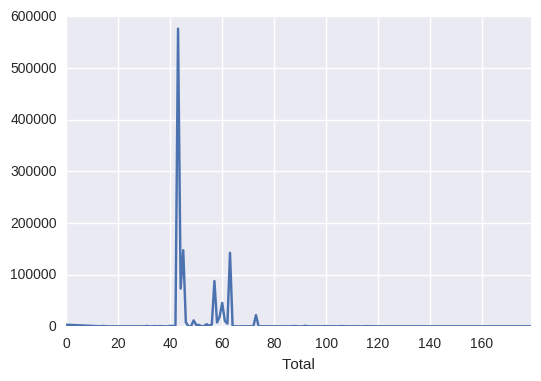

In [36]:
numeric_group_aggregation.groupby(['Total'])['Response'].count().plot()

In [37]:
total_groupby = numeric_group_aggregation.groupby(['Total'])

groupbys = pd.DataFrame()
groupbys['mean'] = total_groupby['Response'].mean()
groupbys['count'] = total_groupby['Response'].count()
groupbys['sum'] = total_groupby['Response'].sum()

total_sum = groupbys['sum'].sum()
total_count = groupbys['count'].sum()

In [38]:
groupbys

,mean,count,sum
Total,,,
0,0.010286,3111,32
13,0.000000,152,0
14,0.006107,655,4
16,0.000000,1,0
17,0.000000,2,0
19,0.000000,4,0
20,0.000000,24,0
21,0.000000,11,0
22,0.000000,21,0


It does appear there are deviations from the overall mean for these subgroups.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

X = numeric_group_aggregation.drop(['Id', 'Response'], axis=1)
y = numeric_group_aggregation['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [41]:
rfc.score(X_test, y_test)

0.99427918780010616

In [42]:
np.mean(rfc.predict(X_test))

0.00042914539243149726

In [43]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [44]:
param = {'bst:max_depth':2, 'bst:eta':.2, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 50
param['eval_metric'] = ['auc','error']

evallist  = [(dtest,'eval'), (dtrain,'train')]

In [45]:
num_round = 60
bst = xgb.train( param, dtrain, num_round, evallist )

[0]	eval-auc:0.579264	eval-error:0.005555	train-auc:0.57238	train-error:0.005897
[1]	eval-auc:0.602224	eval-error:0.005555	train-auc:0.598543	train-error:0.005897
[2]	eval-auc:0.626066	eval-error:0.005555	train-auc:0.637172	train-error:0.005897
[3]	eval-auc:0.626697	eval-error:0.005555	train-auc:0.638159	train-error:0.005897
[4]	eval-auc:0.627133	eval-error:0.005555	train-auc:0.63965	train-error:0.005897
[5]	eval-auc:0.631013	eval-error:0.005555	train-auc:0.643538	train-error:0.005897
[6]	eval-auc:0.637331	eval-error:0.005555	train-auc:0.647821	train-error:0.005897
[7]	eval-auc:0.640857	eval-error:0.005555	train-auc:0.650962	train-error:0.005897
[8]	eval-auc:0.642687	eval-error:0.005555	train-auc:0.652053	train-error:0.005897
[9]	eval-auc:0.642219	eval-error:0.005555	train-auc:0.65342	train-error:0.005897
[10]	eval-auc:0.642608	eval-error:0.005555	train-auc:0.654652	train-error:0.005897
[11]	eval-auc:0.643046	eval-error:0.005555	train-auc:0.65562	train-error:0.005897
[12]	eval-auc:0.64

In [46]:
pd.Series(bst.get_fscore()).sort_values(ascending=False)

L03      303
Total    264
S35      108
S24       80
S25       72
L01       65
L00       59
S26       51
S27       50
S06       49
S38       46
L02       45
S36       43
S11       41
S02       39
S10       33
S33       33
S04       33
S09       32
S18       32
S29       31
S03       30
S14       30
S16       28
S34       28
S31       27
S17       27
S21       26
S19       23
S07       22
S28       19
S05       18
S23       16
S44       14
S22       12
S15       11
S49       10
S50       10
S43        9
S30        8
S39        6
S48        6
S00        4
S37        4
S51        1
S01        1
S41        1
dtype: int64

In the python packeage XGBoost, we can get predictions from the best iteration (preds). Then we take the matthews correlation coefficient and plot the cutoff vs the mcc  

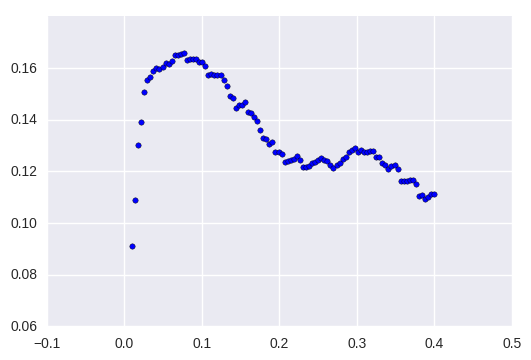

(0.076969696969696966, 0.16575753637239451)


In [47]:
from sklearn.metrics import matthews_corrcoef

preds = bst.predict(dtest)
y = dtest.get_label()

def find_best(preds, y):
    best = (0,0)

    for cutoff in np.linspace(0.01, 0.4, num=100):
        mcc = matthews_corrcoef(y, preds>cutoff)
        if mcc > best[1]:
            best = (cutoff, mcc)
        plt.scatter(cutoff, mcc, s=15 )
    plt.show()
    print(best)
    
find_best(preds, y)

In [48]:
preds

array([ 0.00523089,  0.00349016,  0.00375376, ...,  0.00559775,
        0.00620173,  0.003889  ], dtype=float32)

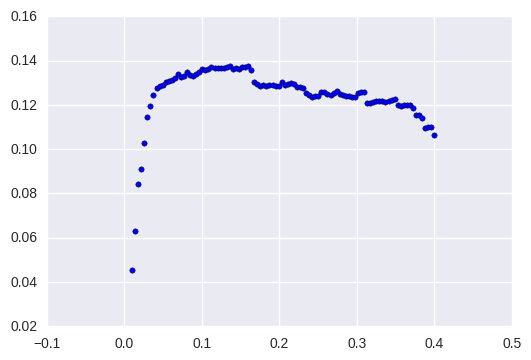

(0.15969696969696973, 0.13742424273258372)


In [49]:
preds = [err for acc, err in rfc.predict_proba(X_test)]
find_best(preds, y_test)

To improve the model:
    - Time lags
    - Outliers count

- Iteratively sample through the original features

Also, a visualization tool for visualizing failures at through each station would be useful.